In [166]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from numpy.linalg import eigh
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [167]:
def zscore(m):
    return ((m.T-np.mean(m,axis=1))/np.std(m,axis=1)).T

def pca(matrix,shape):
    matrix = np.dot(matrix.T,matrix)/shape[0] 
    values,vectors=eigh(matrix)
    vectors=np.asarray(vectors).T
    res = {values[i]: vectors[i] for i in range(len(values))}
    od=OrderedDict(sorted(res.items(),reverse=True))
    return od

def show_img(vector):
  img_data = vector.reshape((64,64))
  plt.imshow(img_data,cmap='gray')
  plt.show()

def find_alphas(data,base_faces):
  matrix=np.empty((len(data),len(base_faces)))
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      matrix[i,j]=np.dot(data[i].T,base_faces[j])
  return matrix

def reconstruction(alphas,base_faces):
  
  for i in range(len(base_faces)):
    if(i==0):
      temp=base_faces[i]*alphas[i]
    else:
      temp+=base_faces[i]*alphas[i] 
  
  show_img(temp)

In [168]:
olivetti = fetch_olivetti_faces()

data = olivetti.images
shape=data.shape
print(shape)

data=data.reshape(shape[0],shape[1]*shape[2])

data = zscore(data.reshape(shape[0],shape[1]*shape[2]))
base_faces_dict = pca(data,shape)

################## Using Library ##########################

pca = PCA(n_components = 16)
matrix = np.dot(data.T,data)/shape[0]
temp=pca.fit(matrix)
base_faces_pca=pca.components_
print(pca.explained_variance_ratio_)

(400, 64, 64)
[9.1814286e-01 4.7983747e-02 1.1697355e-02 5.2762846e-03 4.2795613e-03
 2.5022712e-03 1.6833722e-03 1.5534870e-03 9.7549194e-04 7.4393541e-04
 6.9070718e-04 5.3808233e-04 4.3891100e-04 3.8042502e-04 3.3163268e-04
 2.7003975e-04]


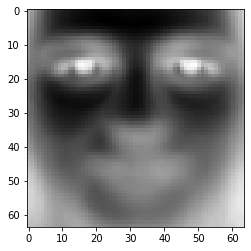

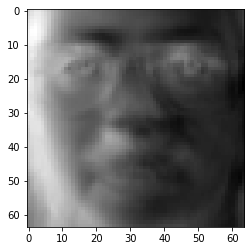

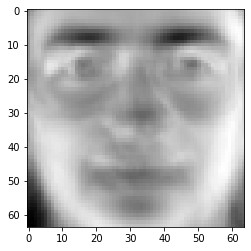

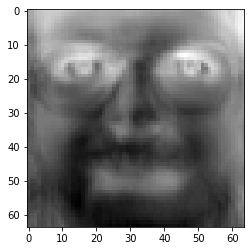

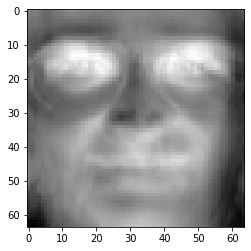

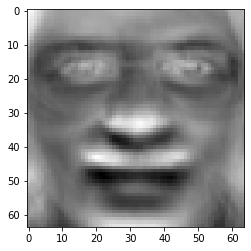

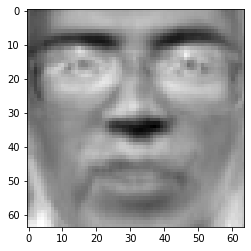

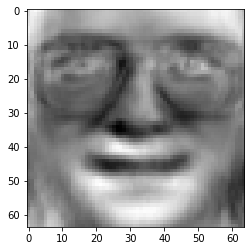

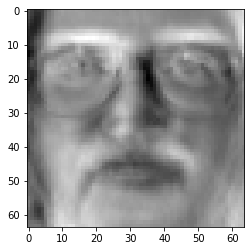

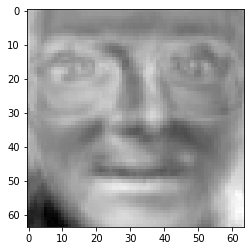

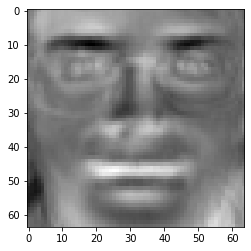

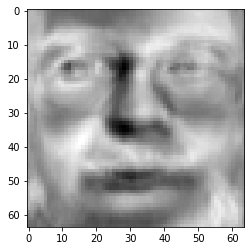

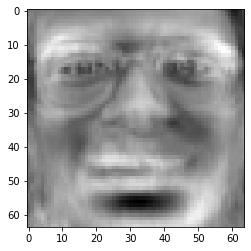

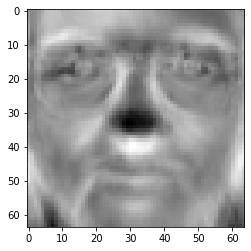

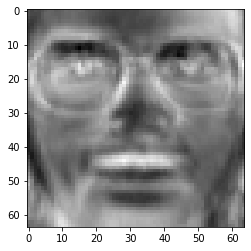

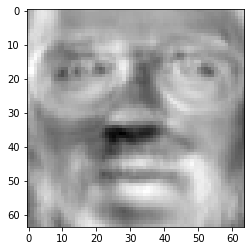

In [169]:
base_faces=[base_faces_dict[i] for i in base_faces_dict]
for i in range(16):
    show_img(base_faces[i])

(400, 4096) 4096
[-31.36338043  10.37053108  29.43094254   5.78148079  15.46630859
  -3.34465957   5.35473204   9.31187534  14.3905859   -1.85106611
  -4.76196003   1.71624351   6.59601116   9.95504856  -9.62440205
  -4.92488623]
(400, 16)


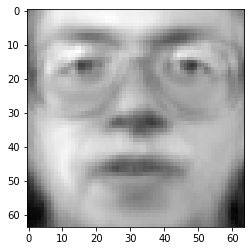

In [170]:
print(data.shape, len(base_faces))
alphas = find_alphas(data,base_faces[:16])
print(alphas[10])
print(alphas.shape)
number = int(input("Enter face number"))
reconstruction(alphas[number],base_faces[:16])